# Calculating Stock Returns using Pandas DataFrames

## 1. Import Libaries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## 2. Create a Path to the File Using Pathlib

In [2]:
# Use the Pathlib libary to set the path to the CSV

msft_path = Path('../Resources/MSFT.csv')



## 3. Read CSV in as DataFrame

In [3]:
# Read in the CSV as a DataFrame
msft_data = pd.read_csv(msft_path)
msft_data.head()


,date,close,volume,open,high,low
0,8/3/09,23.83,46843710,23.82,23.86,23.50
1,8/4/09,23.77,49116380,23.68,23.79,23.53
2,8/5/09,23.81,53263040,23.84,24.25,23.79
3,8/6/09,23.46,59655950,23.93,23.98,23.27
4,8/7/09,23.56,46165010,23.75,23.82,23.50


## 4. Drop Extra Columns

In [4]:
# Drop unnecessary columns
msft_data.drop(columns=['volume', 'open', 'high', 'low'], inplace=True)

## 5. Set Date as Index

In [5]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2517 non-null   object 
 1   close   2517 non-null   float64
 2   volume  2517 non-null   int64  
 3   open    2517 non-null   float64
 4   high    2517 non-null   float64
 5   low     2517 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [6]:
msft_data['date'] = pd.to_datetime(msft_data['date'], infer_datetime_format=True)

In [7]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2517 non-null   datetime64[ns]
 1   close   2517 non-null   float64       
 2   volume  2517 non-null   int64         
 3   open    2517 non-null   float64       
 4   high    2517 non-null   float64       
 5   low     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [8]:
# Set the date as the index to the DataFrame
msft_data.set_index('date',append=True,inplace=True)

In [9]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2517 entries, (0, Timestamp('2009-08-03 00:00:00')) to (2516, Timestamp('2019-08-01 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2517 non-null   float64
 1   volume  2517 non-null   int64  
 2   open    2517 non-null   float64
 3   high    2517 non-null   float64
 4   low     2517 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 147.5 KB


## 6. Drop Extra Date Column

In [10]:
# Drop the extra date column
msft_data.head()

,,close,volume,open,high,low
,date,,,,,
0,2009-08-03,23.83,46843710,23.82,23.86,23.50
1,2009-08-04,23.77,49116380,23.68,23.79,23.53
2,2009-08-05,23.81,53263040,23.84,24.25,23.79
3,2009-08-06,23.46,59655950,23.93,23.98,23.27
4,2009-08-07,23.56,46165010,23.75,23.82,23.50


## 7. Plot Daily Close

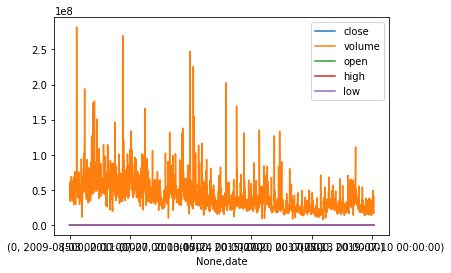

In [11]:
# Plot the daily closing stock price of the S&P 500 over the last 5 years
msft_data.plot(kind='line')

## 8. Calculate Daily Returns

In [12]:
# Calculate the daily return using the 'pct_change()' function
msft_return = msft_data.pct_change()
msft_return

,,close,volume,open,high,low
,date,,,,,
0,2009-08-03,NaN,NaN,NaN,NaN,NaN
1,2009-08-04,-0.002518,0.048516,-0.005877,-0.002934,0.001277
2,2009-08-05,0.001683,0.084425,0.006757,0.019336,0.011050
3,2009-08-06,-0.014700,0.120025,0.003775,-0.011134,-0.021858
4,2009-08-07,0.004263,-0.226146,-0.007522,-0.006672,0.009884
...,...,...,...,...,...,...
2512,2019-07-26,0.008203,0.037083,-0.000427,0.007574,0.007023
2513,2019-07-29,-0.002193,-0.127733,0.008050,-0.001165,-0.006655
2514,2019-07-30,-0.004822,0.014492,-0.009611,-0.002050,0.003116


## 9. Plot Daily Returns

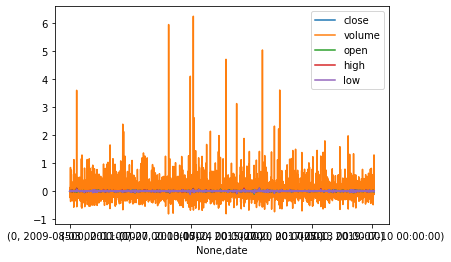

In [13]:
# Plot the daily returns of MSFT over the last 10 years
msft_return.plot(kind='line')

## 10. Calculate Cumulative Returns

In [18]:
# Calculate the cumulative returns using the 'cumprod()' function
msft_cum_return = msft_data.cumprod()
msft_drop = msft_cum_return.drop(['volume', 'open', 'high', 'low'], axis=1)
msft_drop.head()


,,close
,date,
0,2009-08-03,2.383000e+01
1,2009-08-04,5.664391e+02
2,2009-08-05,1.348691e+04
3,2009-08-06,3.164030e+05
4,2009-08-07,7.454455e+06


## 11. Plot Cumulative Returns

ValueError: too many values to unpack (expected 2)

C:\Users\12144\anaconda3\envs\dev\lib\site-packages\matplotlib\ticker.py:2039: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
C:\Users\12144\anaconda3\envs\dev\lib\site-packages\matplotlib\ticker.py:716: RuntimeWarning: overflow encountered in double_scalars
  if abs_min // 10 ** oom != abs_max // 10 ** oom)
C:\Users\12144\anaconda3\envs\dev\lib\site-packages\matplotlib\ticker.py:717: RuntimeWarning: overflow encountered in double_scalars
  if (abs_max - abs_min) / 10 ** oom <= 1e-2:
C:\Users\12144\anaconda3\envs\dev\lib\site-packages\matplotlib\ticker.py:723: RuntimeWarning: overflow encountered in double_scalars
  if abs_max // 10 ** oom - abs_min // 10 ** oom > 1)


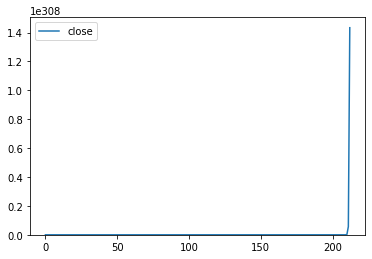

In [19]:
# Plot the daily returns of the S&P 500 over the last 5 years
msft_drop.plot(kind='line', xlim='date', ylim=5)